In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('application_train.csv')

In [3]:
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
null_lis=[]
for i in df.columns:
    if (df[i].isnull().sum()>0)==True:
        null_lis.append(i)
# null_lis

In [5]:
df_null= df[null_lis]

In [6]:
df_null.head()

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,351000.0,Unaccompanied,NaN,Laborers,1.0,0.083037,0.262949,0.139376,0.0247,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,Family,NaN,Core staff,2.0,0.311267,0.622246,NaN,0.0959,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,Unaccompanied,26.0,Laborers,1.0,NaN,0.555912,0.729567,NaN,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,Unaccompanied,NaN,Laborers,2.0,NaN,0.650442,NaN,NaN,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,Unaccompanied,NaN,Core staff,1.0,NaN,0.322738,NaN,NaN,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
drop_lis=[]
feature_lis=[]
for i in df_null:
    if (df_null[i].isnull().sum())>150000:
        drop_lis.append(i)
    else:
        feature_lis.append(i)
drop_lis,  feature_lis

(['OWN_CAR_AGE',
  'EXT_SOURCE_1',
  'APARTMENTS_AVG',
  'BASEMENTAREA_AVG',
  'YEARS_BEGINEXPLUATATION_AVG',
  'YEARS_BUILD_AVG',
  'COMMONAREA_AVG',
  'ELEVATORS_AVG',
  'ENTRANCES_AVG',
  'FLOORSMAX_AVG',
  'FLOORSMIN_AVG',
  'LANDAREA_AVG',
  'LIVINGAPARTMENTS_AVG',
  'LIVINGAREA_AVG',
  'NONLIVINGAPARTMENTS_AVG',
  'NONLIVINGAREA_AVG',
  'APARTMENTS_MODE',
  'BASEMENTAREA_MODE',
  'YEARS_BEGINEXPLUATATION_MODE',
  'YEARS_BUILD_MODE',
  'COMMONAREA_MODE',
  'ELEVATORS_MODE',
  'ENTRANCES_MODE',
  'FLOORSMAX_MODE',
  'FLOORSMIN_MODE',
  'LANDAREA_MODE',
  'LIVINGAPARTMENTS_MODE',
  'LIVINGAREA_MODE',
  'NONLIVINGAPARTMENTS_MODE',
  'NONLIVINGAREA_MODE',
  'APARTMENTS_MEDI',
  'BASEMENTAREA_MEDI',
  'YEARS_BEGINEXPLUATATION_MEDI',
  'YEARS_BUILD_MEDI',
  'COMMONAREA_MEDI',
  'ELEVATORS_MEDI',
  'ENTRANCES_MEDI',
  'FLOORSMAX_MEDI',
  'FLOORSMIN_MEDI',
  'LANDAREA_MEDI',
  'LIVINGAPARTMENTS_MEDI',
  'LIVINGAREA_MEDI',
  'NONLIVINGAPARTMENTS_MEDI',
  'NONLIVINGAREA_MEDI',
  'FONDKAPREM

In [8]:
df=df.drop(columns=drop_lis)
#deleting all the null value columns which are more than 50 % in the column data
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#feature_lis

In [10]:
df_null

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,351000.0,Unaccompanied,NaN,Laborers,1.0,0.083037,0.262949,0.139376,0.0247,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,Family,NaN,Core staff,2.0,0.311267,0.622246,NaN,0.0959,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,Unaccompanied,26.0,Laborers,1.0,NaN,0.555912,0.729567,NaN,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,Unaccompanied,NaN,Laborers,2.0,NaN,0.650442,NaN,NaN,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,Unaccompanied,NaN,Core staff,1.0,NaN,0.322738,NaN,NaN,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,27558.0,225000.0,Unaccompanied,NaN,Sales staff,1.0,0.145570,0.681632,NaN,0.2021,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,12001.5,225000.0,Unaccompanied,NaN,NaN,1.0,NaN,0.115992,NaN,0.0247,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,29979.0,585000.0,Unaccompanied,NaN,Managers,1.0,0.744026,0.535722,0.218859,0.1031,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,20205.0,319500.0,Unaccompanied,NaN,Laborers,2.0,NaN,0.514163,0.661024,0.0124,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_null=df_null.drop(columns=drop_lis)

In [12]:
df_null

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,351000.0,Unaccompanied,Laborers,1.0,0.262949,0.139376,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,Family,Core staff,2.0,0.622246,NaN,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,Unaccompanied,Laborers,1.0,0.555912,0.729567,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,Unaccompanied,Laborers,2.0,0.650442,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,Unaccompanied,Core staff,1.0,0.322738,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,27558.0,225000.0,Unaccompanied,Sales staff,1.0,0.681632,NaN,0.2898,No,0.0,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,12001.5,225000.0,Unaccompanied,NaN,1.0,0.115992,NaN,0.0214,No,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,29979.0,585000.0,Unaccompanied,Managers,1.0,0.535722,0.218859,0.7970,No,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,20205.0,319500.0,Unaccompanied,Laborers,2.0,0.514163,0.661024,0.0086,No,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
categorical_lis=[]
continous_lis=[]
for i in df_null:
    if len(df_null[i].value_counts()) >500:
        continous_lis.append(i)
    else:
        categorical_lis.append(i)
continous_lis,categorical_lis

(['AMT_ANNUITY',
  'AMT_GOODS_PRICE',
  'EXT_SOURCE_2',
  'EXT_SOURCE_3',
  'TOTALAREA_MODE',
  'DAYS_LAST_PHONE_CHANGE'],
 ['NAME_TYPE_SUITE',
  'OCCUPATION_TYPE',
  'CNT_FAM_MEMBERS',
  'EMERGENCYSTATE_MODE',
  'OBS_30_CNT_SOCIAL_CIRCLE',
  'DEF_30_CNT_SOCIAL_CIRCLE',
  'OBS_60_CNT_SOCIAL_CIRCLE',
  'DEF_60_CNT_SOCIAL_CIRCLE',
  'AMT_REQ_CREDIT_BUREAU_HOUR',
  'AMT_REQ_CREDIT_BUREAU_DAY',
  'AMT_REQ_CREDIT_BUREAU_WEEK',
  'AMT_REQ_CREDIT_BUREAU_MON',
  'AMT_REQ_CREDIT_BUREAU_QRT',
  'AMT_REQ_CREDIT_BUREAU_YEAR'])

In [14]:
df_null[continous_lis].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   AMT_ANNUITY             307499 non-null  float64
 1   AMT_GOODS_PRICE         307233 non-null  float64
 2   EXT_SOURCE_2            306851 non-null  float64
 3   EXT_SOURCE_3            246546 non-null  float64
 4   TOTALAREA_MODE          159080 non-null  float64
 5   DAYS_LAST_PHONE_CHANGE  307510 non-null  float64
dtypes: float64(6)
memory usage: 14.1 MB


In [15]:
df_null_continous=df_null[continous_lis]

In [16]:
mode_impute = ['CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE' , 'DEF_30_CNT_SOCIAL_CIRCLE', 
               'OBS_60_CNT_SOCIAL_CIRCLE' , 'DEF_60_CNT_SOCIAL_CIRCLE']

median_impute = ['AMT_ANNUITY' ,'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE']

for i in range(len(mode_impute)):
    df[mode_impute[i]].fillna(df[mode_impute[i]].mode()[0], inplace=True)
    
for j in range(len(median_impute)):
    df[median_impute[j]].fillna(df[median_impute[j]].median(), inplace=True)

In [18]:
len(df.isnull().sum()>1)

75

In [20]:
df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 75, dtype: int64

In [ ]:
# imputer= SimpleImputer(missing_values=np.nan, strategy='median')
# imputer.fit(df_null_continous)
# df_null_continous= imputer.transform(df_null_continous)

In [ ]:
# df=df.drop(columns=continous_lis)
# df[continous_lis]=df_null_continous #imputing forward filled values for continous variable in the data frame

In [ ]:
# imputer= SimpleImputer(missing_values=np.nan, strategy='most')
# imputer.fit(df_null_categorical)
# df_null_categorical= imputer.transform(df_null_categorical)

In [ ]:
# df[categorical_lis] = df[categorical_lis].apply(lambda x:x.fillna(x.value_counts().index[0]))#for categorical imputation-mode

In [ ]:
# df.head()

In [21]:
df.TARGET.value_counts(normalize= True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [22]:
df2 = df.copy()

In [23]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED'].replace(365243,0)

In [25]:
df.DAYS_EMPLOYED.value_counts()

 0        55376
-200        156
-224        152
-199        151
-230        151
          ...  
-13467        1
-12852        1
-9369         1
-10740        1
-13365        1
Name: DAYS_EMPLOYED, Length: 12573, dtype: int64

In [26]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
object_lis=[]
numeric_lis=[]
for i in df:
    if df[i].dtypes=='object':
        object_lis.append(i)
    else:
        numeric_lis.append(i)
numeric_lis

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_

In [28]:
categorical_lis1=[]
continous_lis1=[]
for i in df:
    if len(df[i].value_counts()) >2 and df[i].dtypes!='object':
        continous_lis1.append(i)
    else:
        categorical_lis1.append(i)
continous_lis1

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [29]:
from sklearn.preprocessing import StandardScaler
scaler_num = StandardScaler()
train_num1 = scaler_num.fit_transform(df[continous_lis1])

In [30]:
df=df.drop(columns=continous_lis1)
df[continous_lis1]=train_num1 #imputing forward filled values for continous variable in the data frame11

In [31]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,4.163504,0.252132,5.253260,-0.206992,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.346719
1,0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,...,-0.320480,-0.168527,-0.275663,0.163107,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565
2,0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,-0.320480,-0.589187,-0.275663,0.178831,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565
3,0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,...,-0.320480,0.252132,-0.275663,0.418306,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565
4,0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,-0.320480,-0.589187,-0.275663,-0.173126,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565


In [32]:
def oversample(df):
    classes = df.TARGET.value_counts().to_dict()
    most = max(classes.values())
    classes_list = []
    for key in classes:
        classes_list.append(df[df['TARGET'] == key]) 
    classes_sample = []
    for i in range(1,len(classes_list)):
        classes_sample.append(classes_list[i].sample(most, replace=True))
    df_maybe = pd.concat(classes_sample)
    final_df = pd.concat([df_maybe,classes_list[0]], axis=0)
    final_df = final_df.reset_index(drop=True)
    return final_df

In [33]:
df=oversample(df)

In [34]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,"Spouse, partner",Working,Secondary / secondary special,Civil marriage,House / apartment,...,-0.32048,-0.589187,-0.275663,1.164552,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565
1,1,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-0.32048,0.252132,-0.275663,0.852507,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565
2,1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,...,-0.32048,-0.589187,-0.275663,0.383232,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.346719
3,1,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Separated,House / apartment,...,-0.32048,-0.589187,-0.275663,0.476361,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565
4,1,Cash loans,M,Y,Y,Family,Working,Secondary / secondary special,Married,House / apartment,...,-0.32048,-0.168527,-0.275663,-0.734322,-0.070987,-0.058766,5.087241,3.231419,-0.30862,0.192127


In [35]:
df= pd.get_dummies(df,columns=object_lis)

In [37]:
X= df.drop(columns=['TARGET','SK_ID_CURR'])
y= df['TARGET']

In [38]:
#Splitting the data in train,val,test
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [39]:
# from sklearn import preprocessing
# X_scale = preprocessing.StandardScaler().fit_transform(X)
# X_scale= pd.DataFrame(X_scale)
# X_scale

# Model 1

In [91]:
lr= LogisticRegression(max_iter=10000).fit(X_train,y_train)

In [92]:
y_pred=lr.predict(X_test)

In [93]:
lr.predict_proba(X_test)

array([[0.71114414, 0.28885586],
       [0.06649803, 0.93350197],
       [0.14361666, 0.85638334],
       ...,
       [0.57414317, 0.42585683],
       [0.36139769, 0.63860231],
       [0.65301255, 0.34698745]])

In [43]:
lr.score(X_test,y_test)

0.7486203806334457

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [45]:
from sklearn import metrics

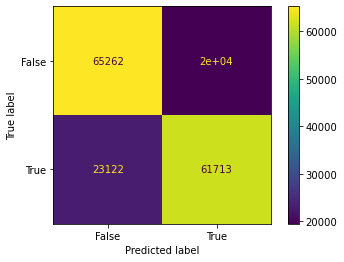

In [46]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, f1_score, precision_score

In [48]:
recall_score(y_test, y_pred)

0.7274473978900218

In [49]:
accuracy_score(y_test, y_pred)

0.7486203806334457

In [50]:
precision_score(y_test, y_pred)

0.7597503323976954

In [51]:
f1_score(y_test, y_pred)

0.743248044416878

In [88]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.7486276233584721

In [1]:
# from sklearn.metrics import roc_curve
# y_pred_proba = lr.predict_proba(X_test)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# # Plotting the ROC Curve
# plt.plot([0,1],[0,1],'k--')
# plt.plot(fpr,tpr, label='Logistic Regression')
# plt.xlabel('fpr')
# plt.ylabel('tpr')
# plt.title('ROC curve')
# plt.show()

# Model 2

In [52]:
#using RFE, IV

In [53]:
from sklearn.feature_selection import RFE

In [54]:
rfe=RFE(estimator=LogisticRegression(class_weight='balanced'),n_features_to_select=50)

In [55]:
# rfe.fit(X,y)

In [56]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [57]:
final_iv, IV = data_vars(X,y)

C:\Users\MADHAV MEHTA\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\MADHAV MEHTA\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [58]:
columns=IV[IV.IV>0.01]
col=[]

for x in columns["VAR_NAME"]:
    col.append(x)
col

['AMT_GOODS_PRICE',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_EMP_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_Working',
 'OCCUPATION_TYPE_Drivers',
 'ORGANIZATION_TYPE_Self-employed',
 'ORGANIZATION_TYPE_XNA',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'TOTALAREA_MODE']

In [73]:
X_iv= X[col]
y_iv= y

In [67]:
#Splitting the data in train,val,test
X_train_iv, X_test_iv, y_train_iv, y_test_iv= train_test_split(X_iv,y_iv,test_size=0.3,random_state=42)

In [68]:
# y_pred_new_threshold_train = (lr.predict_proba(X_train)[:,1]>=0.2).astype(int) #changing the threshold
# y_pred_new_threshold_test = (lr.predict_proba(X_test)[:,1]>=0.2).astype(int)

# y_pred_train= lr.predict(X_train)
# y= lr.predict_proba(X)

# y_pred_new_threshold_train.sum(), y_pred_new_threshold_test

In [75]:
lr= LogisticRegression(max_iter=10000).fit(X_train_iv,y_train_iv)


In [76]:
y_pred_iv=lr.predict(X_test_iv)

In [77]:
lr.predict_proba(X_test_iv)

array([[0.75603484, 0.24396516],
       [0.06112864, 0.93887136],
       [0.18604168, 0.81395832],
       ...,
       [0.48823563, 0.51176437],
       [0.32189085, 0.67810915],
       [0.61772033, 0.38227967]])

In [78]:
lr.score(X_test_iv,y_test_iv)

0.7442574817819494

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [80]:
from sklearn import metrics

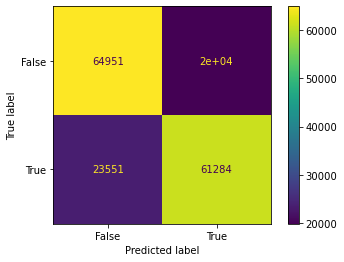

In [81]:
confusion_matrix = metrics.confusion_matrix(y_test_iv, y_pred_iv)
confusion_matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [82]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, f1_score, precision_score

In [83]:
recall_score(y_test_iv, y_pred_iv)

0.7223905227795132

In [84]:
accuracy_score(y_test_iv, y_pred_iv)

0.7442574817819494

In [85]:
precision_score(y_test_iv, y_pred_iv)

0.7555665146097892

In [86]:
f1_score(y_test_iv, y_pred_iv)

0.7386061646931212

In [87]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_iv,y_pred_iv)

0.7442649618981493